In [1]:
import numpy as np
import random
from time import sleep
import numpy.random as npr
import math
import numpy as np
import random
import sys
import tsplib95
import networkx as nx
import time
import os
import pandas as pd


In [2]:
# get all files from the instances folder
files = os.listdir('instances')
files

['att48.tsp',
 'berlin52.tsp',
 'brazil58.tsp',
 'burma14.tsp',
 'dantzig42.tsp',
 'eil101.tsp',
 'eil51.tsp',
 'eil76.tsp',
 'f10.tsp',
 'gr48.tsp',
 'gr96.tsp',
 'hk48.tsp',
 'kroA100.tsp',
 'kroB100.tsp',
 'kroC100.tsp',
 'kroD100.tsp',
 'kroE100.tsp',
 'lin105.tsp',
 'pr107.tsp',
 'pr76.tsp',
 'rat99.tsp',
 'rd100.tsp',
 'st70.tsp',
 'swiss42.tsp']

In [3]:
# create a dict that will be turned into a dataframe later the keys should be:
# file, n, m, ratio1, ratio2, density, min, max, mean, median, Q25, Q75, std, var
datadict = {'file': [], 'n': [], 'm': [], 'ratio1': [], 'ratio2': [], 'density': [], 'min': [], 'max': [], 'mean': [], 'std': [], 'var': []}

In [142]:
# for all files in the instances folder make a graph and get information such as mean, std, min, max


for f in files:
    problem = tsplib95.load('Instances/' + f)
    graph = problem.get_graph()
    dist_matrix = nx.to_numpy_matrix(graph)

    # get the number of nodes
    n = len(graph.nodes)

    # get the number of edges
    m = len(graph.edges)

    # get the ratio of nodes to edges and vice versa
    ratio1 = n/m
    ratio2 = m/n
    # get the density of the graph
    density = nx.density(graph)

    # get the min, max, mean, median, Q25, Q75, std, var of the distances
    emin = np.min(dist_matrix)
    emax = np.max(dist_matrix)

    mean = np.mean(dist_matrix)


    #Q25 = np.quantile(dist_matrix, 0.25)
    #Q75 = np.quantile(dist_matrix, 0.75)
    std = np.std(dist_matrix)

    var = np.var(dist_matrix)


    # add the information to the dict
    datadict['file'].append(f)
    datadict['n'].append(n)
    datadict['m'].append(m)
    datadict['ratio1'].append(ratio1)
    datadict['ratio2'].append(ratio2)
    datadict['density'].append(density)
    datadict['min'].append(emin)
    datadict['max'].append(emax)
    datadict['mean'].append(mean)

    #datadict['Q25'].append(Q25)
    #datadict['Q75'].append(Q75)
    datadict['std'].append(std)
    datadict['var'].append(var)




In [143]:
# turn the dict into a dataframe
df = pd.DataFrame.from_dict(datadict)
df

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,3.938798e+05
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,1.195237e+05
2,brazil58.tsp,58,1711,0.033898,29.5,1.035088,0.0,8700.0,2094.914388,1426.139588,2.033874e+06
3,burma14.tsp,14,105,0.133333,7.5,1.153846,1.0,1261.0,442.612245,272.511473,7.426250e+04
4,dantzig42.tsp,42,903,0.046512,21.5,1.048780,0.0,192.0,72.295918,43.481585,1.890648e+03
5,eil101.tsp,101,5151,0.019608,51.0,1.020000,0.0,92.0,33.580237,16.613751,2.760167e+02
6,eil51.tsp,51,1326,0.038462,26.0,1.040000,0.0,86.0,31.760861,15.586857,2.429501e+02
7,eil76.tsp,76,2926,0.025974,38.5,1.026667,0.0,85.0,32.759349,16.107539,2.594528e+02
8,f10.tsp,10,55,0.181818,5.5,1.222222,0.0,2550.0,1105.700000,737.133265,5.433655e+05
9,gr48.tsp,48,1176,0.040816,24.5,1.042553,0.0,1083.0,428.766493,219.692229,4.826468e+04


In [144]:
# new binary column called gils that I will fill manually
df['gils'] = 0
df

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var,gils
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,3.938798e+05,0
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,1.195237e+05,0
2,brazil58.tsp,58,1711,0.033898,29.5,1.035088,0.0,8700.0,2094.914388,1426.139588,2.033874e+06,0
3,burma14.tsp,14,105,0.133333,7.5,1.153846,1.0,1261.0,442.612245,272.511473,7.426250e+04,0
4,dantzig42.tsp,42,903,0.046512,21.5,1.048780,0.0,192.0,72.295918,43.481585,1.890648e+03,0
5,eil101.tsp,101,5151,0.019608,51.0,1.020000,0.0,92.0,33.580237,16.613751,2.760167e+02,0
6,eil51.tsp,51,1326,0.038462,26.0,1.040000,0.0,86.0,31.760861,15.586857,2.429501e+02,0
7,eil76.tsp,76,2926,0.025974,38.5,1.026667,0.0,85.0,32.759349,16.107539,2.594528e+02,0
8,f10.tsp,10,55,0.181818,5.5,1.222222,0.0,2550.0,1105.700000,737.133265,5.433655e+05,0
9,gr48.tsp,48,1176,0.040816,24.5,1.042553,0.0,1083.0,428.766493,219.692229,4.826468e+04,0


In [145]:
# set gils to 1 in the dantzig42 row
# df.loc[df['file'] == 'eil101.tsp', 'gils'] = 1

In [146]:
df

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var,gils
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,3.938798e+05,0
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,1.195237e+05,0
2,brazil58.tsp,58,1711,0.033898,29.5,1.035088,0.0,8700.0,2094.914388,1426.139588,2.033874e+06,0
3,burma14.tsp,14,105,0.133333,7.5,1.153846,1.0,1261.0,442.612245,272.511473,7.426250e+04,0
4,dantzig42.tsp,42,903,0.046512,21.5,1.048780,0.0,192.0,72.295918,43.481585,1.890648e+03,0
5,eil101.tsp,101,5151,0.019608,51.0,1.020000,0.0,92.0,33.580237,16.613751,2.760167e+02,0
6,eil51.tsp,51,1326,0.038462,26.0,1.040000,0.0,86.0,31.760861,15.586857,2.429501e+02,0
7,eil76.tsp,76,2926,0.025974,38.5,1.026667,0.0,85.0,32.759349,16.107539,2.594528e+02,0
8,f10.tsp,10,55,0.181818,5.5,1.222222,0.0,2550.0,1105.700000,737.133265,5.433655e+05,0
9,gr48.tsp,48,1176,0.040816,24.5,1.042553,0.0,1083.0,428.766493,219.692229,4.826468e+04,0


In [147]:
# save the dataframe as a csv
# df.to_csv('data.csv', index=False)

In [148]:
# train a model on the data that predicts gils


In [149]:
# get the data
df = pd.read_csv('data.csv')
df

,file,n,m,ratio1,ratio2,density,min,max,mean,std,var,gils
0,att48.tsp,48,1176,0.040816,24.5,1.042553,0.0,2662.0,1017.559896,627.598414,3.938798e+05,1
1,berlin52.tsp,52,1378,0.037736,26.5,1.039216,0.0,1716.0,564.188609,345.722052,1.195237e+05,1
2,brazil58.tsp,58,1711,0.033898,29.5,1.035088,0.0,8700.0,2094.914388,1426.139588,2.033874e+06,0
3,burma14.tsp,14,105,0.133333,7.5,1.153846,1.0,1261.0,442.612245,272.511473,7.426250e+04,0
4,dantzig42.tsp,42,903,0.046512,21.5,1.048780,0.0,192.0,72.295918,43.481585,1.890648e+03,1
5,eil101.tsp,101,5151,0.019608,51.0,1.020000,0.0,92.0,33.580237,16.613751,2.760167e+02,1
6,eil51.tsp,51,1326,0.038462,26.0,1.040000,0.0,86.0,31.760861,15.586857,2.429501e+02,1
7,eil76.tsp,76,2926,0.025974,38.5,1.026667,0.0,85.0,32.759349,16.107539,2.594528e+02,0
8,f10.tsp,10,55,0.181818,5.5,1.222222,0.0,2550.0,1105.700000,737.133265,5.433655e+05,0
9,gr48.tsp,48,1176,0.040816,24.5,1.042553,0.0,1083.0,428.766493,219.692229,4.826468e+04,1


In [150]:
# get the features
X = df[['n', 'm', 'ratio1', 'ratio2', 'density', 'min', 'max', 'mean', 'std', 'var']]
y = df['gils']



In [151]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)



In [152]:
# train a random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)



RandomForestClassifier()

In [153]:
# get the predictions
y_pred = rf.predict(X_test)



In [154]:
# get the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.6666666666666666

In [155]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(3, 0, 2, 1)

In [156]:
# predict the entire dataset
y_pred = rf.predict(X)


In [157]:
# get the accuracy
accuracy_score(y, y_pred)


0.9166666666666666

In [158]:
# get the confusion matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
(tn, fp, fn, tp)

(16, 0, 2, 6)

In [159]:
# now train a logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [160]:
# get the predictions
y_pred = lr.predict(X_test)


In [161]:
# get the accuracy
accuracy_score(y_test, y_pred)

0.8333333333333334

In [163]:
# get the confusion matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(3, 0, 1, 2)

In [164]:
#get the predictions for the entire dataset
y_pred = lr.predict(X)


In [165]:
# get the accuracy
accuracy_score(y, y_pred)

0.9166666666666666

In [166]:
# get the confusion matrix

In [167]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
(tn, fp, fn, tp)

(15, 1, 1, 7)

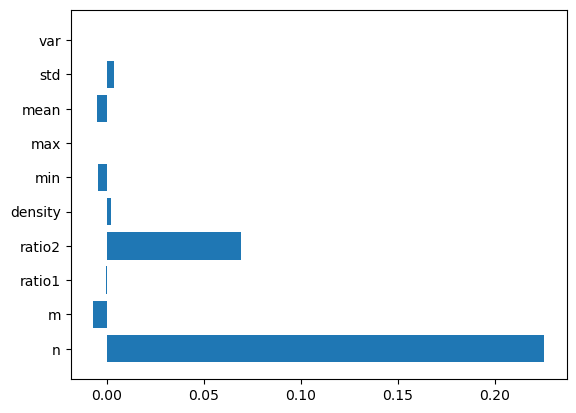

In [168]:
# display the logistic regression
import matplotlib.pyplot as plt
plt.barh(X.columns, lr.coef_[0])
plt.show()

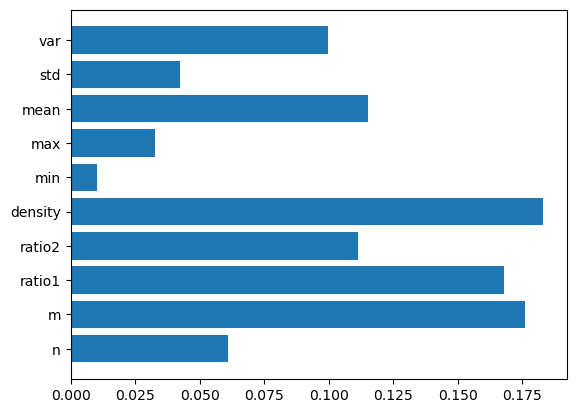

In [169]:
# display the random forest
plt.barh(X.columns, rf.feature_importances_)
plt.show()